<a href="https://colab.research.google.com/github/inessellami/QM2-Project-/blob/main/Single%20Regression%20and%20Education.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data used to represent education is the percentage of population by state that did not complete highschool between 2014 and 2018. It can be found on the USDA open source catalogue.

To format the data I took from the 'United States Department of Agriculture Economic Research centre' (https://data.ers.usda.gov/reports.aspx?ID=17829&AspxAutoDetectCookieSupport=1), I deleted all columns of data other than the values for total population in 2014-18, as this compares most accurately to the 2014 data we have elsewhere. I also changed the percentages to numerical values in order to manipulate them more easily in Python.

The second csv (2014 income) was based on the one produced by Nelson although I changed the title of his data from '2014' to 'income' to avoid confusion and also added my education dataset under the title 'Education'. 

All of this took place in excel... 

Note to all: we need to make a folder to use the !mkdir method of accessing data, but I was unsure of how to do this...

Note to self: show both the original data set and also cleaned dataset.

In [ ]:
!mkdir data
!curl

# I am downloading the CSV's from my computer, as this line of code worked. Please download "Education.csv" and "2014 income.csv" onto your computer and import them into the workbook.







In [2]:
from google.colab import files
uploaded = files.upload()


Saving Education.csv to Education.csv


In [13]:
from google.colab import files
uploaded = files.upload()


Saving US.csv to US.csv


In [5]:
import pandas

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Rename the datasets to Abortion and Education.

In [14]:
Abortion = pandas.read_csv('US.csv')
Abortion.head()

,Rank,States,Income,Income2,Abortion,Education,Religion,Republican,Neutral,Democrat,Sample_size,GEO,Party
0,1,Alabama,42830,23606,8.3,0.142,77,52,13,35,511,1,Republican
1,2,Alaska,71583,33062,10.0,0.073,45,39,29,32,310,2,Republican
2,3,Arizona,50068,25715,9.8,0.132,53,40,21,39,653,4,Republican
3,4,Arkansas,41262,22883,8.0,0.138,70,46,16,38,311,5,Republican
4,5,California,61933,30441,19.5,0.171,49,30,21,49,3697,6,Democrat


In [9]:
Education = pandas.read_csv('Education.csv')
Education.head()

,Name,2014-2018
0,Alabama,0.142
1,Alaska,0.073
2,Arizona,0.132
3,Arkansas,0.138
4,California,0.171


# I was just checking that the Education values looked as I was expecting

In [10]:
Education['2014-2018']

0     0.142
1     0.073
2     0.132
3     0.138
4     0.171
5     0.086
6     0.095
7     0.102
8     0.094
9     0.120
10    0.133
11    0.082
12    0.094
13    0.111
14    0.114
15    0.080
16    0.093
17    0.143
18    0.152
19    0.077
20    0.100
21    0.096
22    0.095
23    0.070
24    0.161
25    0.104
26    0.068
27    0.089
28    0.137
29    0.071
30    0.105
31    0.147
32    0.135
33    0.126
34    0.075
35    0.099
36    0.122
37    0.096
38    0.098
39    0.120
40    0.129
41    0.083
42    0.130
43    0.168
44    0.080
45    0.074
46    0.107
47    0.089
48    0.135
49    0.081
50    0.071
Name: 2014-2018, dtype: float64

In [11]:
plt.style.use('ggplot')

# Code for a histogram to investigate the spread of education data:

Text(0.5, 1.0, 'US highschool dropout distribution 2014-18')

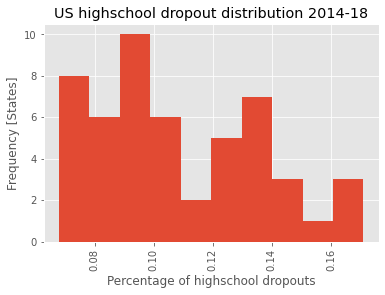

In [15]:
summary = Education['2014-2018'].hist(bins = 10, xlabelsize = 10, xrot = 90)
plt.xlabel('Percentage of highschool dropouts')
plt.ylabel('Frequency [States]')
plt.title('US highschool dropout distribution 2014-18')

In [16]:
Education.columns

Index(['Name', '2014-2018'], dtype='object')

# Plotting boxplot to further give further information about my raw data:

Text(0.5, 1.0, 'Range of proportion not finishing highschool')

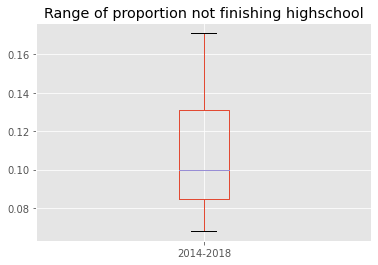

In [17]:
Education.boxplot()
plt.title('Range of proportion not finishing highschool')

In [18]:
Abortion.columns

Index(['Rank', 'States', 'Income', 'Income2', 'Abortion', 'Education',
       'Religion', 'Republican', 'Neutral', 'Democrat', 'Sample_size', 'GEO',
       'Party'],
      dtype='object')

# Plotting a scatter plot of abortion rates against Education

Text(0.5, 1.0, 'Abortion against Education scatter graph')

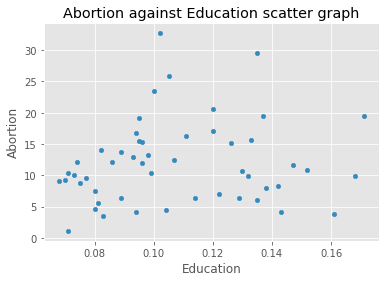

In [ ]:
Abortion.plot(y='Abortion', x='Education', kind='scatter')
plt.title('Abortion against Education scatter graph')

# Adding a Regression Line to the scatter plots for all variables

perform regression procedure:

In [21]:
x_values = Abortion['Education']
y_values = Abortion['Abortion']
X_values = sms.add_constant(x_values)
regression_model_a = sms.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()
print(regression_model_b.summary())
print()


                            OLS Regression Results                            
Dep. Variable:               Abortion   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.6250
Date:                Thu, 03 Dec 2020   Prob (F-statistic):              0.433
Time:                        10:53:37   Log-Likelihood:                -168.20
No. Observations:                  51   AIC:                             340.4
Df Residuals:                      49   BIC:                             344.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1086      3.763      2.421      0.0

Store relevant values:

In [22]:
gradient  = regression_model_b.params[1]
intercept = regression_model_b.params[0]
Rsquared  = regression_model_b.rsquared
MSE       = regression_model_b.mse_resid
pvalue    = regression_model_b.f_pvalue


Print relevant values:

In [23]:
print("gradient  =", regression_model_b.params[1])
print("intercept =", regression_model_b.params[0])
print("Rsquared  =", regression_model_b.rsquared)
print("MSE       =", regression_model_b.mse_resid)
print("pvalue    =", regression_model_b.f_pvalue)

gradient  = 26.754215099160124
intercept = 9.108609734515946
Rsquared  = 0.012595009424878345
MSE       = 44.613478340066294
pvalue    = 0.43299490868629087


Plot figure:

Create endpoints of best fit line:

In [26]:
x_lobf = [min(x_values),max(x_values)]
y_lobf = [x_lobf[0]*gradient + intercept,x_lobf[1]*gradient + intercept]

Create and save plot:

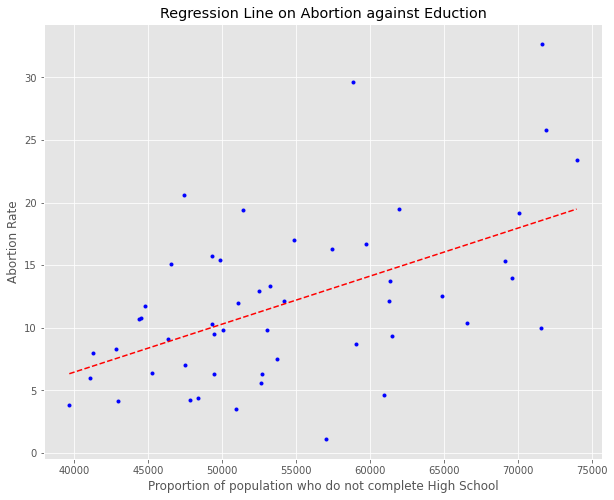

In [50]:
plt.figure(figsize=(figure_width,figure_height))
plt.plot(x_values,y_values,'b.',x_lobf,y_lobf,'r--')
plt.title('Regression Line on Abortion against Eduction')
plt.xlabel('Proportion of population who do not complete High School')
plt.ylabel('Abortion Rate')
plt.savefig('Regression Line on Abortion against Eduction')

# Repeat Code for different variables

# 2) Religion

In [39]:
x_values = Abortion['Religion']
y_values = Abortion['Abortion']
X_values = sms.add_constant(x_values)
regression_model_a = sms.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()
gradient  = regression_model_b.params[1]
intercept = regression_model_b.params[0]
Rsquared  = regression_model_b.rsquared
MSE       = regression_model_b.mse_resid
pvalue    = regression_model_b.f_pvalue
print("gradient  =", regression_model_b.params[1])
print("intercept =", regression_model_b.params[0])
print("Rsquared  =", regression_model_b.rsquared)
print("MSE       =", regression_model_b.mse_resid)
print("pvalue    =", regression_model_b.f_pvalue)

gradient  = -0.18423285411265625
intercept = 22.061592103256576
Rsquared  = 0.08673194421873731
MSE       = 41.263782352912884
pvalue    = 0.035922497615204


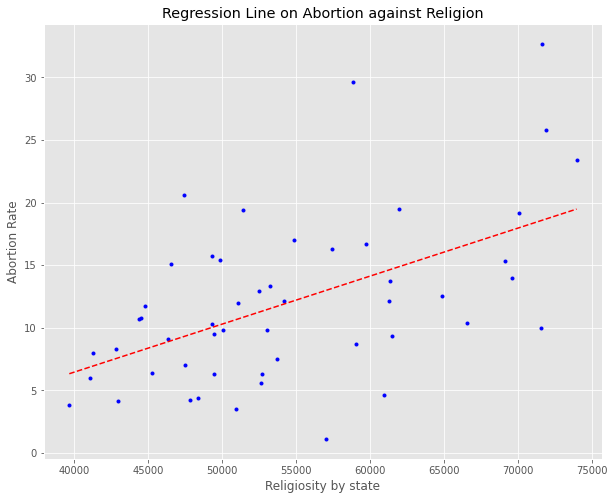

In [48]:
x_lobf = [min(x_values),max(x_values)]
y_lobf = [x_lobf[0]*gradient + intercept,x_lobf[1]*gradient + intercept]
plt.figure(figsize=(figure_width,figure_height))
plt.plot(x_values,y_values,'b.',x_lobf,y_lobf,'r--')
plt.title('Regression Line on Abortion against Religion')
plt.xlabel('Religiosity by state')
plt.ylabel('Abortion Rate')
plt.savefig('Regression Line of Abortion against Religion')

# 3) Democrat

In [37]:
x_values = Abortion['Democrat']
y_values = Abortion['Abortion']
X_values = sms.add_constant(x_values)
regression_model_a = sms.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()
gradient  = regression_model_b.params[1]
intercept = regression_model_b.params[0]
Rsquared  = regression_model_b.rsquared
MSE       = regression_model_b.mse_resid
pvalue    = regression_model_b.f_pvalue
print("gradient  =", regression_model_b.params[1])
print("intercept =", regression_model_b.params[0])
print("Rsquared  =", regression_model_b.rsquared)
print("MSE       =", regression_model_b.mse_resid)
print("pvalue    =", regression_model_b.f_pvalue)

gradient  = 0.5881885292447473
intercept = -13.301910679092758
Rsquared  = 0.5503710811359221
MSE       = 20.31538246644484
pvalue    = 4.704558972730408e-10


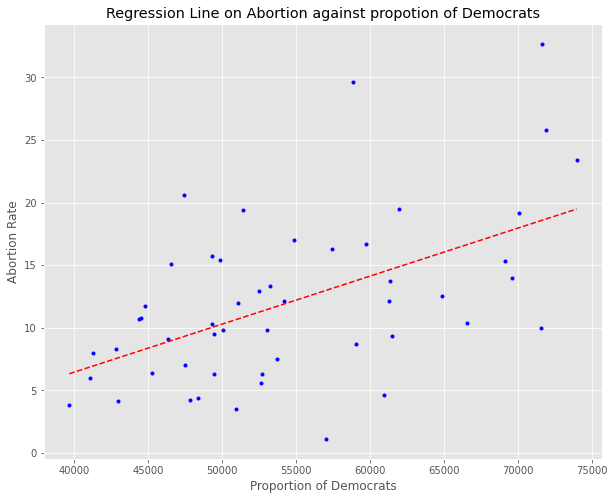

In [47]:
x_lobf = [min(x_values),max(x_values)]
y_lobf = [x_lobf[0]*gradient + intercept,x_lobf[1]*gradient + intercept]
plt.figure(figsize=(figure_width,figure_height))
plt.plot(x_values,y_values,'b.',x_lobf,y_lobf,'r--')
plt.title('Regression Line on Abortion against propotion of Democrats')
plt.xlabel('Proportion of Democrats')
plt.ylabel('Abortion Rate')
plt.savefig('Regression Line of Abortion against propotion of Democrats')

# 4) Republican

In [41]:
x_values = Abortion['Republican']
y_values = Abortion['Abortion']
X_values = sms.add_constant(x_values)
regression_model_a = sms.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()
gradient  = regression_model_b.params[1]
intercept = regression_model_b.params[0]
Rsquared  = regression_model_b.rsquared
MSE       = regression_model_b.mse_resid
pvalue    = regression_model_b.f_pvalue
print("gradient  =", regression_model_b.params[1])
print("intercept =", regression_model_b.params[0])
print("Rsquared  =", regression_model_b.rsquared)
print("MSE       =", regression_model_b.mse_resid)
print("pvalue    =", regression_model_b.f_pvalue)

gradient  = -0.6271704868699957
intercept = 36.5851171321567
Rsquared  = 0.6343791770429804
MSE       = 16.519682218913417
pvalue    = 2.7728581153541193e-12


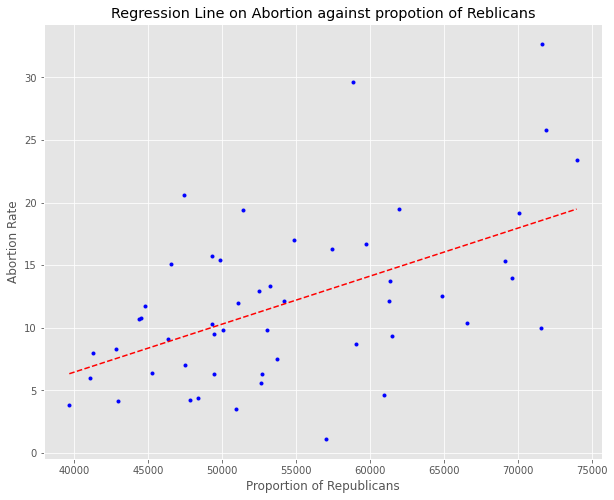

In [46]:
x_lobf = [min(x_values),max(x_values)]
y_lobf = [x_lobf[0]*gradient + intercept,x_lobf[1]*gradient + intercept]
plt.figure(figsize=(figure_width,figure_height))
plt.plot(x_values,y_values,'b.',x_lobf,y_lobf,'r--')
plt.title('Regression Line on Abortion against propotion of Reblicans')
plt.xlabel('Proportion of Republicans')
plt.ylabel('Abortion Rate')
plt.savefig('Regression Line of Abortion against propotion of Republicans')

# 5) Income

In [44]:
x_values = Abortion['Income']
y_values = Abortion['Abortion']
X_values = sms.add_constant(x_values)
regression_model_a = sms.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()
gradient  = regression_model_b.params[1]
intercept = regression_model_b.params[0]
Rsquared  = regression_model_b.rsquared
MSE       = regression_model_b.mse_resid
pvalue    = regression_model_b.f_pvalue
print("gradient  =", regression_model_b.params[1])
print("intercept =", regression_model_b.params[0])
print("Rsquared  =", regression_model_b.rsquared)
print("MSE       =", regression_model_b.mse_resid)
print("pvalue    =", regression_model_b.f_pvalue)

gradient  = 0.0003837728358150946
intercept = -8.90761942389249
Rsquared  = 0.2832284821439396
MSE       = 32.38556710962353
pvalue    = 5.833713058235418e-05


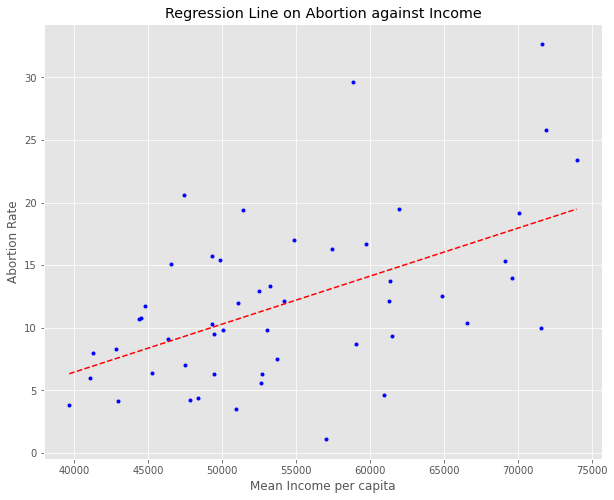

In [45]:
x_lobf = [min(x_values),max(x_values)]
y_lobf = [x_lobf[0]*gradient + intercept,x_lobf[1]*gradient + intercept]
plt.figure(figsize=(figure_width,figure_height))
plt.plot(x_values,y_values,'b.',x_lobf,y_lobf,'r--')
plt.title('Regression Line on Abortion against Income')
plt.xlabel('Mean Income per capita')
plt.ylabel('Abortion Rate')
plt.savefig('Regression Line of Abortion against Income')